# <a id='packages'></a>
### Import Packages

In [1]:
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, gc
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline

# Display settings
pd.options.display.max_rows = 400
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format

random_state = 42
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

<a id='reading'></a>
### Reading the data as a dataframe and print the first five rows

In [2]:
# Reading the data as dataframe and print the first five rows
cccd = pd.read_excel('./Credit_Card_Customer_Data.xlsx')
cccd.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
# Printing the column names
cccd.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

<a id='info'></a>
### Get info of the dataframe columns and check missing values

In [4]:
# Get info of the dataframe columns
cccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<a id='o1'></a>
#### Observation - Dataset shape
Dataset has 660 rows and 7 columns. All features are of numerical types. The data has no null values

In [5]:
# Checking missing values in dataframe
cccd.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<a id='o1'></a>
#### Observation
* No null values in the dataset

<a id='eda'></a>
## Exploratory Data Analysis
Performing exploratory data analysis on the bank dataset.

<a id='5point'></a>
### Five point summary of numerical attributes and check unique values in 'object' columns

In [6]:
# Five point summary
cccd.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.00,330.50,190.67,1.00,165.75,330.50,495.25,660.00
Customer Key,660.00,55141.44,25627.77,11265.00,33825.25,53874.50,77202.50,99843.00
Avg_Credit_Limit,660.00,34574.24,37625.49,3000.00,10000.00,18000.00,48000.00,200000.00
Total_Credit_Cards,660.00,4.71,2.17,1.00,3.00,5.00,6.00,10.00
Total_visits_bank,660.00,2.40,1.63,0.00,1.00,2.00,4.00,5.00
Total_visits_online,660.00,2.61,2.94,0.00,1.00,2.00,4.00,15.00
Total_calls_made,660.00,3.58,2.87,0.00,1.00,3.00,5.00,10.00


<a id='o3'></a>
#### Observation - Descriptive statistics for the numerical variables
Descriptive statistics for the numerical variables
* **`S1_No`**: Range of Q1 to Q3 is between 165.75 to 495.25. It appears that the column is almost normally distributed.

* **`Customer Key`**: Range of Q1 to Q3 is 33825.25 to 77202.50. This column data is positively skewed since mean is greater than median.

* **`Average_Credit_limit`**: Range of Q1 to Q3 is 10000 to 48000. This column data is positively skewed since mean is greater than median.

* **`Total_Credit_Cards`**: Range of Q1 to Q3 is 3 to 6. This column data is slightly negatively skewed since mean is less than median.

* **`Total_visits_bank`**: Range of Q1 to Q3 is 1 to 4. Mean is greater than median, we can say that the column is skewed towards right.

* **`Total_visits_online`**: Range of Q1 to Q3 is 1 to 4. Mean is greater than median, we can say that the column is skewed towards right.

* **`Total_calls_made`**: Range of Q1 to Q3 is 1 to 5. Mean is greater than median, we can say that the column is skewed towards right.

 # Dropping Sl_No and Customer Key column

In [7]:
# dropping the first 2 columns of the dataset
cccd_drop = cccd.drop({'Sl_No', 'Customer Key'}, axis=1)
cccd_drop.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<a id='o1'></a>
#### Observation
* Dropped the first 2 columns because they were not important for the clustering 

# Find duplicated rows

In [8]:
# Finding the duplicated values in the dataset
cccd_drop[cccd_drop.duplicated(keep=False)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
17,8000,2,0,3,4
29,8000,4,0,4,7
56,6000,1,0,2,5
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
250,18000,6,3,1,4
252,9000,4,5,0,4
257,10000,6,4,2,3
295,10000,6,4,2,3


# Remove duplicates

In [9]:
# Dropping the duplicated values in the dataset
cccd_drop.drop_duplicates(inplace=True)
sum(cccd_drop.duplicated())
cccd_drop.shape

(649, 5)

In [10]:
# Functions that will help us with EDA plot
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient='v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'{col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'{col} without outliers')
    
    return plt.show()

# Correlation matrix for all variables
def correlation_matrix(df, threshold = 0.8):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize = (15, 7.2))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
    ax.set_title('Correlation Matrix of Data')

    # Filter for correlation value greater than threshold
    sort = corr.abs().unstack()
    sort = sort.sort_values(kind = "quicksort", ascending = False)
    display(sort[(sort > threshold) & (sort < 1)])

<a id='unibi'></a>
### Univariate and Bivariate Visualization
Looking at one feature at a time to understand how are the values distributed and checking outliers

Avg_credit_limit column --------------------------------------------------------------------------------


38

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,157000,9,1,14,1
614,163000,8,1,7,1
615,131000,9,1,10,1
617,136000,8,0,13,0
618,121000,7,0,13,2


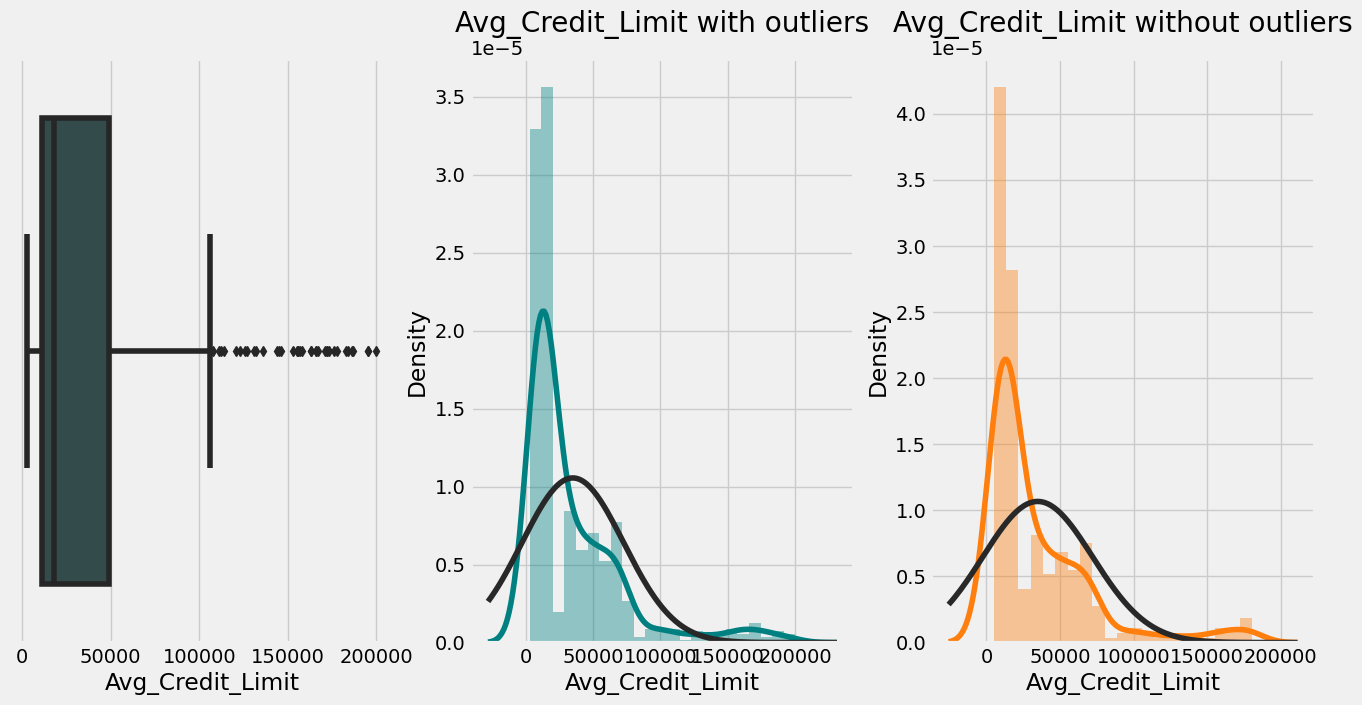

Total_credit_cards column --------------------------------------------------------------------------------


0

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


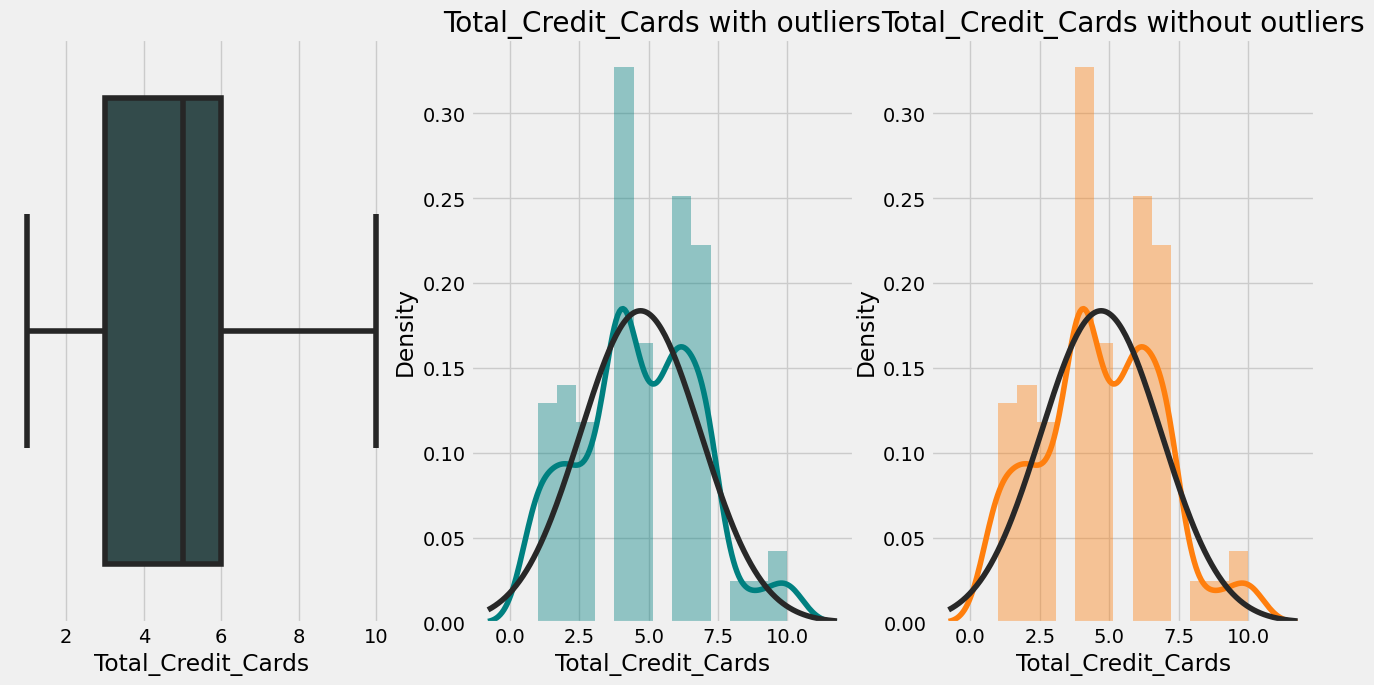

Total_visits_bank column --------------------------------------------------------------------------------


0

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


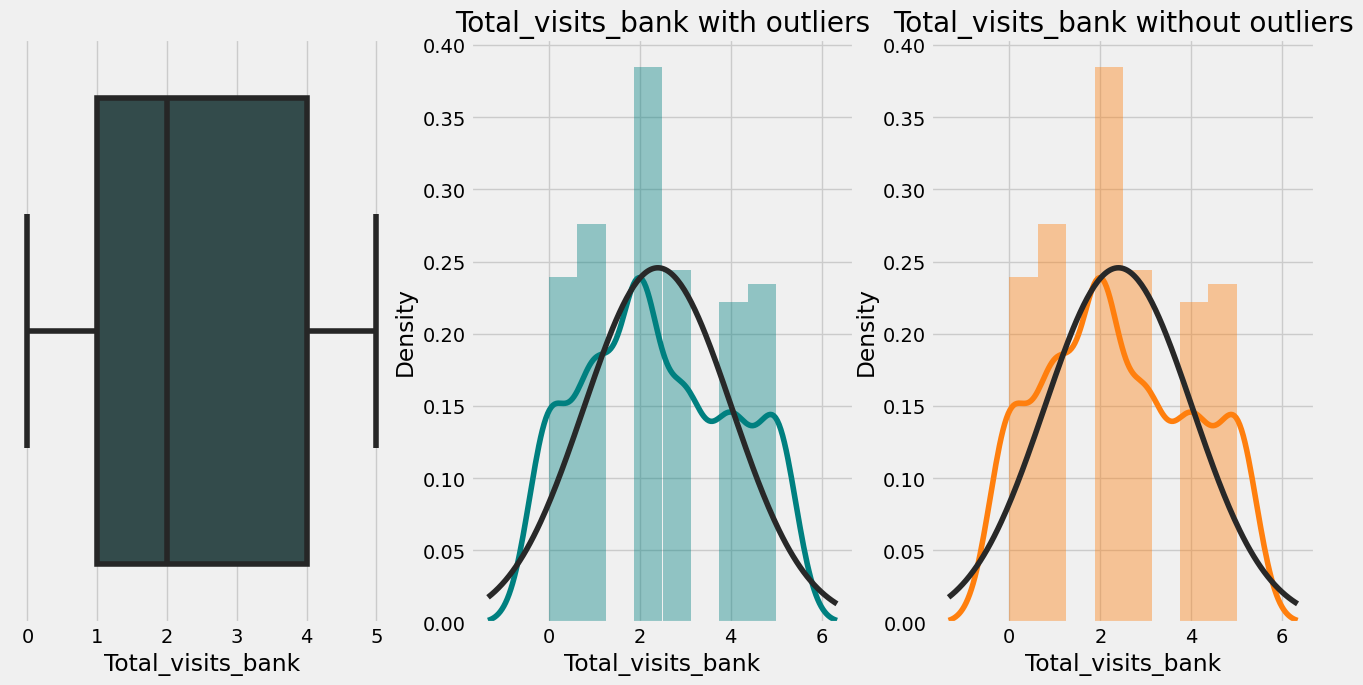

Total_visits_online column --------------------------------------------------------------------------------


37

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
4,100000,6,0,12,3
6,100000,5,0,11,2
612,157000,9,1,14,1
613,94000,9,1,11,0


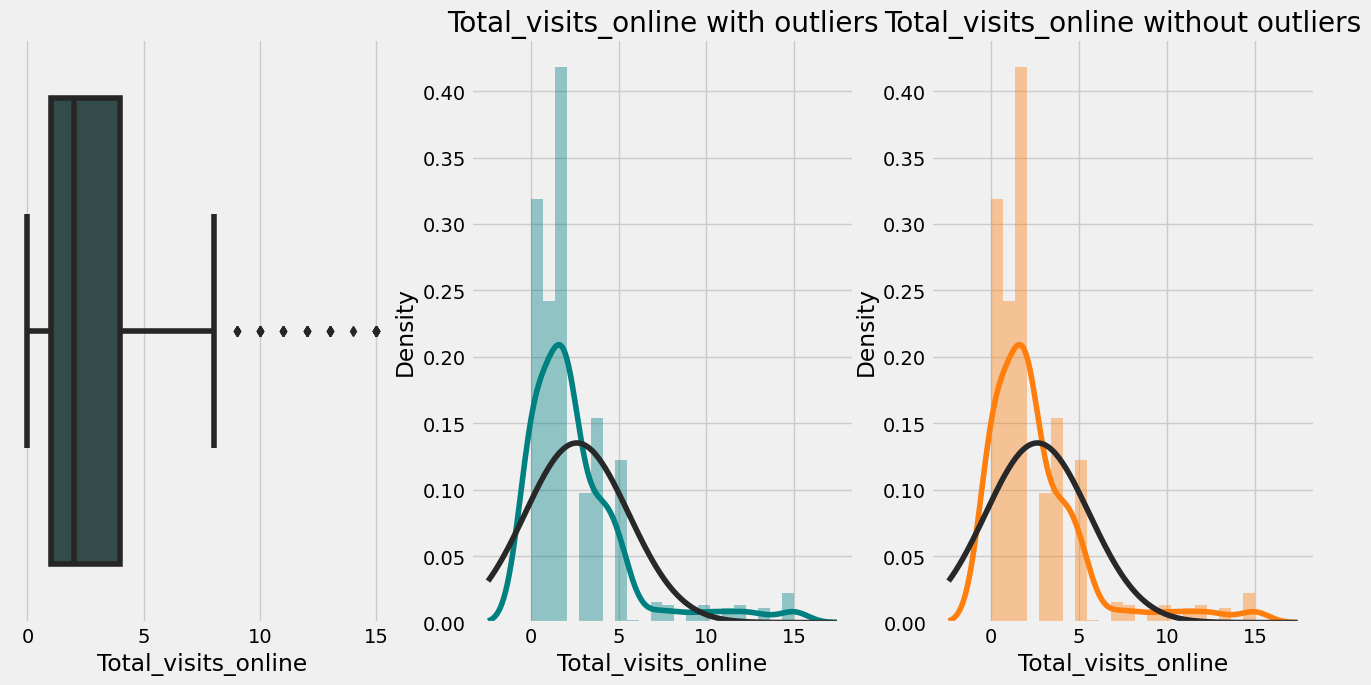

Total_calls_made column --------------------------------------------------------------------------------


0

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


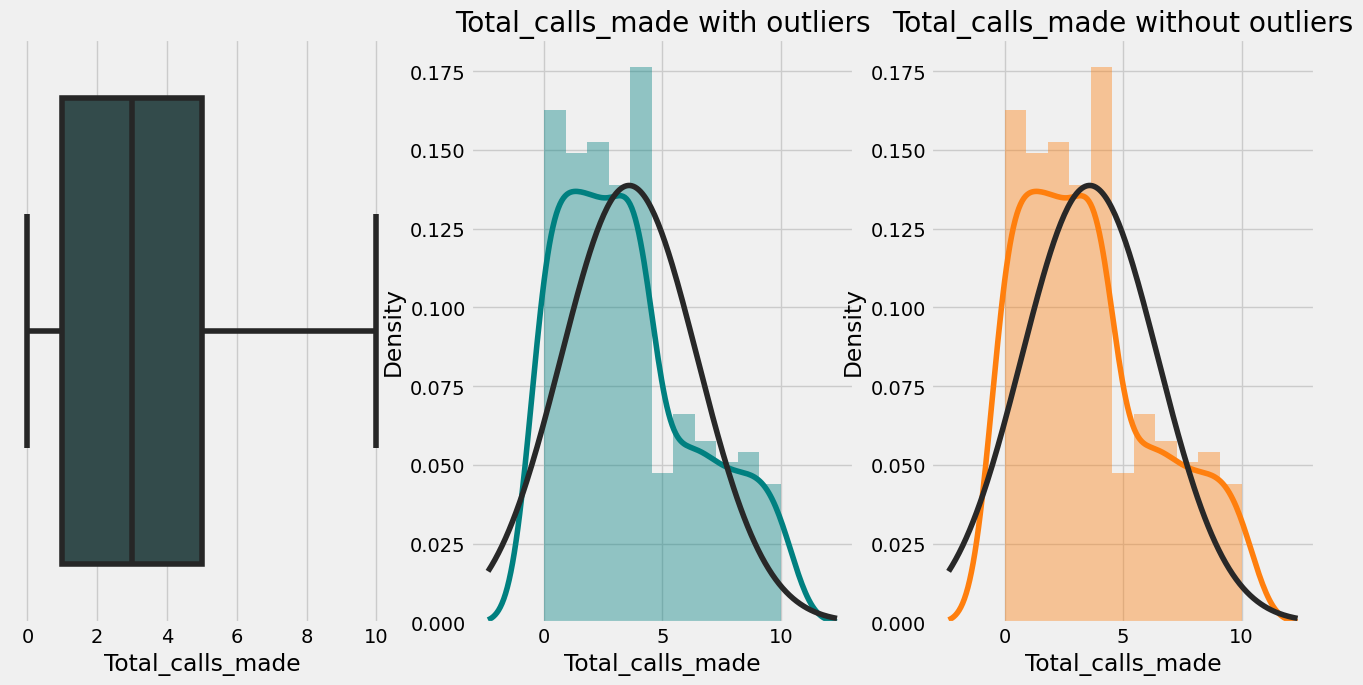

In [11]:
# Outlier, distribution for columns with outliers
boxplotcolumns = ['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
for cols in boxplotcolumns:
    Q3 = cccd_drop[cols].quantile(0.75)
    Q1 = cccd_drop[cols].quantile(0.25)
    IQR = Q3 - Q1

    print(f'{cols.capitalize()} column', '--'*40)
    display(len(cccd_drop.loc[(cccd_drop[cols] < (Q1 - 1.5 * IQR)) | (cccd_drop[cols] > (Q3 + 1.5 * IQR))]), 
            cccd_drop.loc[(cccd_drop[cols] < (Q1 - 1.5 * IQR)) | (cccd_drop[cols] > (Q3 + 1.5 * IQR))].head())
    odp_plots(cccd_drop, cols)

del cols, IQR, boxplotcolumns

<a id='o6'></a>
#### Observation - Comments after checking outliers and distribution
* Used box plot for the features of the vehicle dataframe. Found that `Avg_Credit_Limit`, `Total_visits_online`columns has outliers. 
* Used quantile method to check outliers in these column. It appears that `Avg_Credit_Limit` has outliers around 38 and `Total_visits_online` has outliers around 37. 
* It appears that removing outliers below 25% percentile and above 75% percentile will bring most of the columns to almost normal distribution. 

<a id='multi'></a>
### Multivariate Visualization
Checking relationship between two or more variables. 

In [12]:
cccd_drop.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<AxesSubplot: >

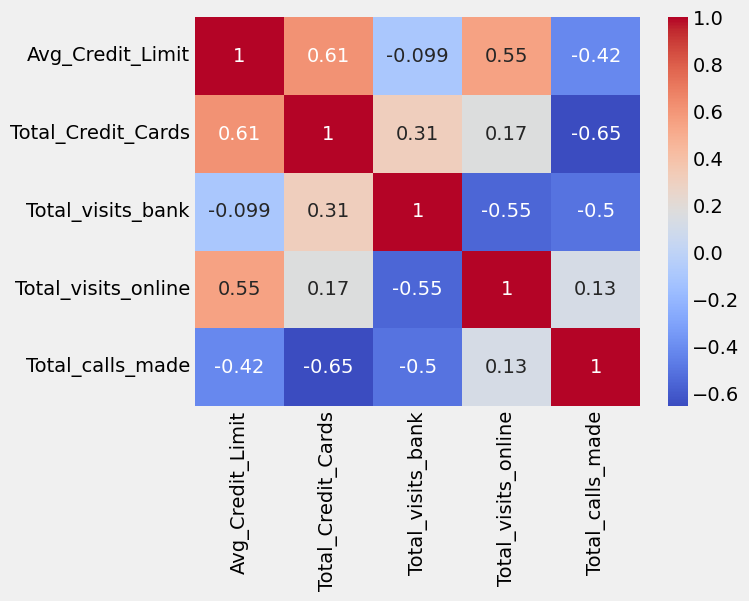

In [13]:
# Correlation matrix for all variables
sns.heatmap(cccd_drop.corr(), annot=True, cmap='coolwarm')

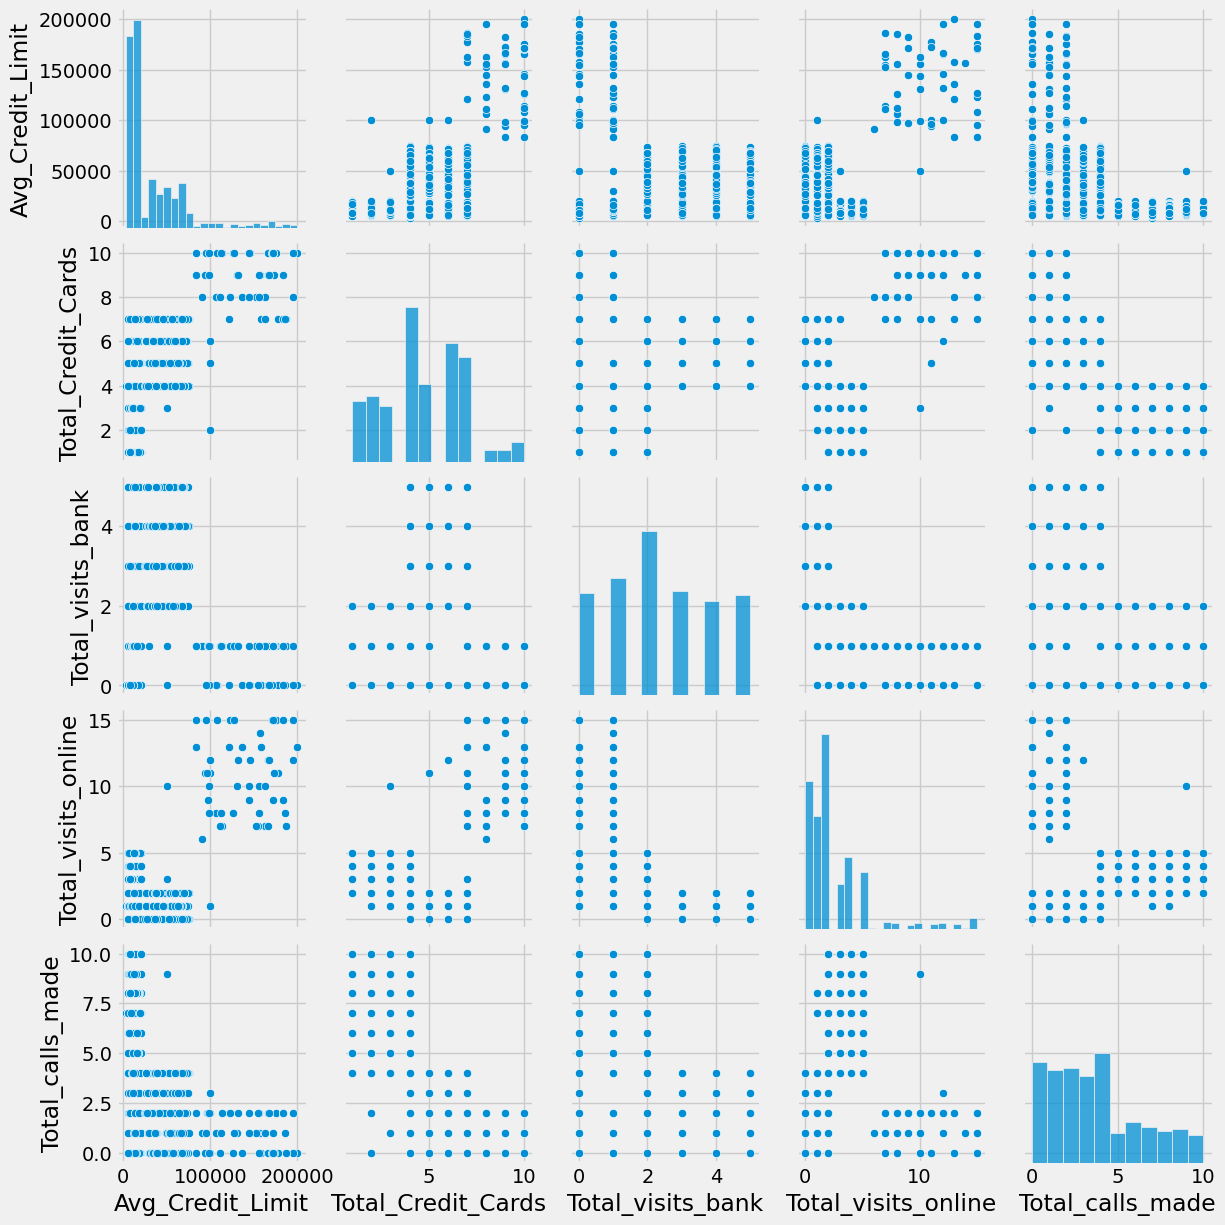

In [14]:
sns.pairplot(cccd_drop)

<a id='o6'></a>
#### Observation
* From the kde distribuiton of pairplot it looks like number of clusters can be between 3-6

In [15]:
# Applying scaling to the features
from scipy.stats import zscore

cccd_drop_z = cccd_drop.apply(zscore)

cccd_drop_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.72,-1.25,-0.86,-0.55,-1.25
1,0.40,-0.79,-1.48,2.50,1.88
2,0.40,1.05,-0.86,0.13,0.14
3,-0.13,0.13,-0.86,-0.55,0.14
4,1.72,0.59,-1.48,3.18,-0.21


<a id='o1'></a>
#### Observation
* Scaled columns loose their units and starts to represent number of standard deviations away from mean

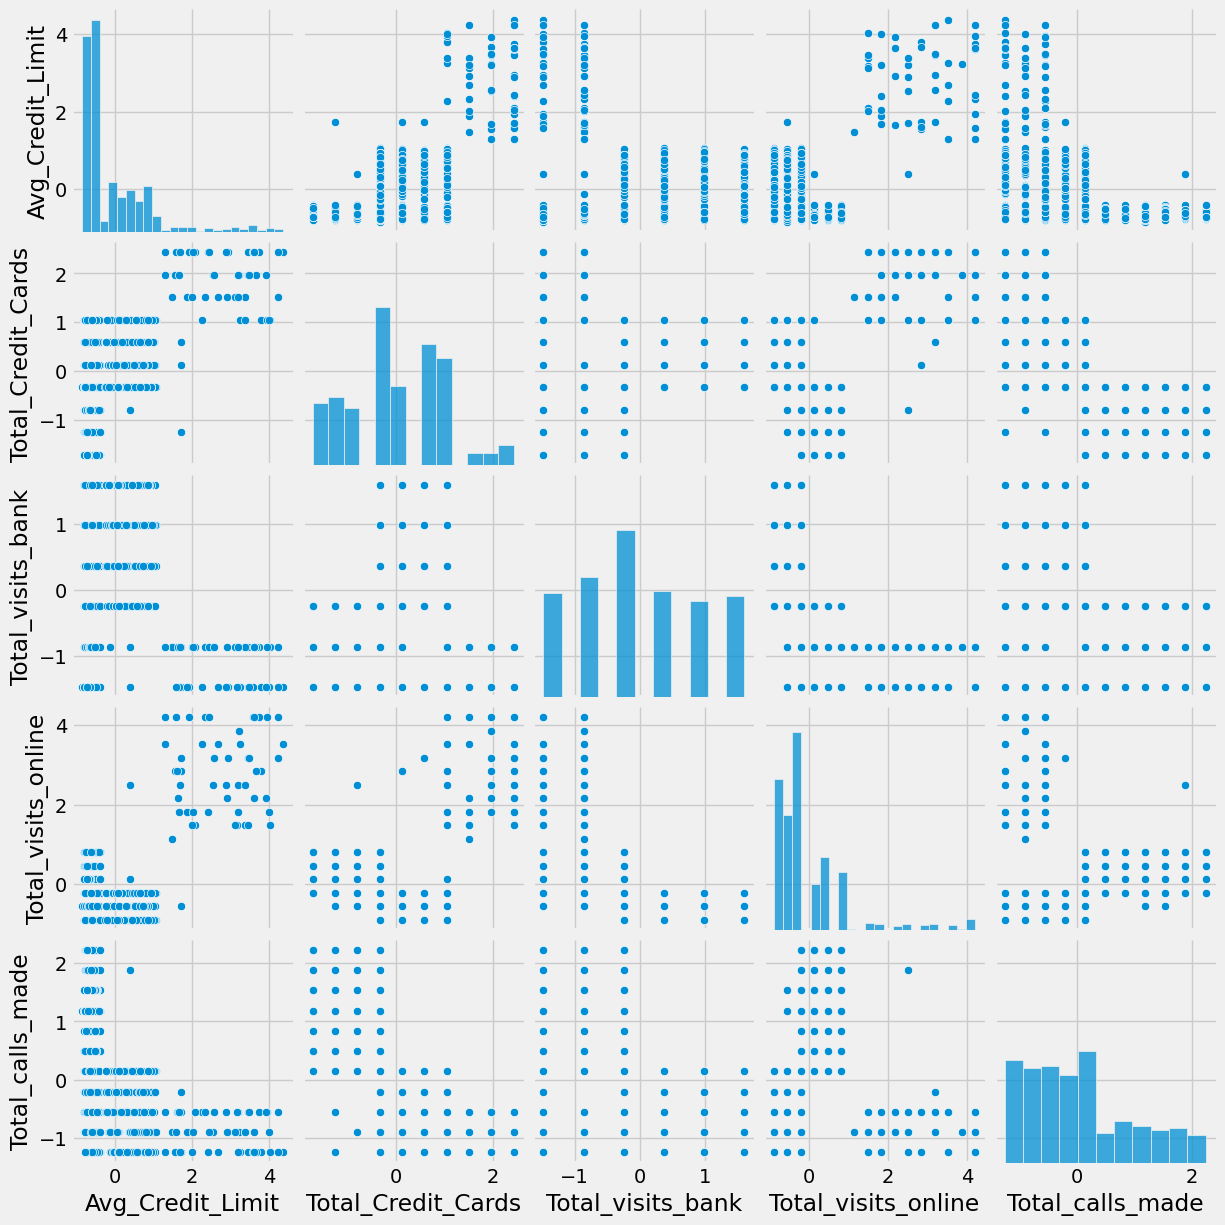

In [16]:
# On diagonal Kernal density estimation plots and off-diagonal scatter plots
sns.pairplot(cccd_drop_z)

## Finding optimal no. of clusters using Elbow method + K-means clustering

## Method-1 Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

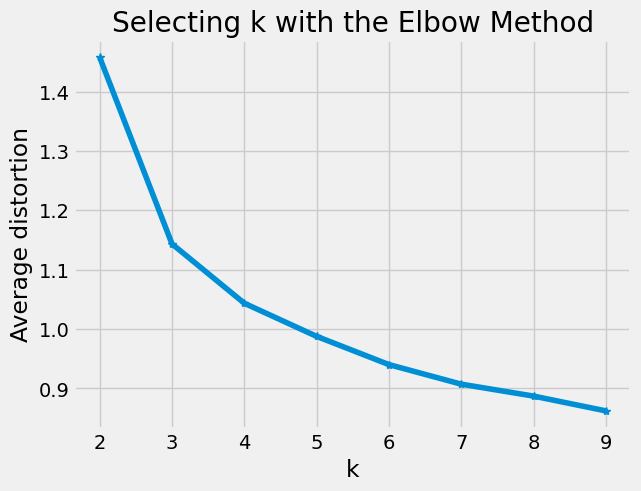

In [17]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]
# appending mean distortions and plotting for different k's to find the optinum number of clusters
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cccd_drop_z)
    prediction=model.predict(cccd_drop_z)
    meanDistortions.append(sum(np.min(cdist(cccd_drop_z, model.cluster_centers_, 'euclidean'), axis=1)) / cccd_drop_z.shape[0])


plt.plot(clusters, meanDistortions, '*-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

<a id='o1'></a>
#### Observation
* looks like k=3 is the optimal number of clusters

### Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.

# Method-2: K-Means clustering analysis

In [18]:

kmeans = KMeans(n_clusters=3, random_state = 1)
kmeans.fit(cccd_drop_z)

KMeans(n_clusters=3, random_state=1)

In [19]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cccd_drop_z))
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.60,-1.06,-0.89,0.32,1.15
1,-0.02,0.37,0.67,-0.56,-0.56
2,2.81,1.86,-1.11,2.80,-0.87


In [20]:
cccd_drop_labels = pd.DataFrame(kmeans.labels_, columns = list(['labels']))
cccd_drop_labels['labels'] = cccd_drop_labels['labels'].astype('int')
cccd_drop_labels['labels'].value_counts().sort_index()

0    221
1    378
2     50
Name: labels, dtype: int64

array([<AxesSubplot: title={'center': 'Avg_Credit_Limit'}, xlabel='[labels]'>,
       <AxesSubplot: title={'center': 'Total_Credit_Cards'}, xlabel='[labels]'>,
       <AxesSubplot: title={'center': 'Total_calls_made'}, xlabel='[labels]'>,
       <AxesSubplot: title={'center': 'Total_visits_bank'}, xlabel='[labels]'>,
       <AxesSubplot: title={'center': 'Total_visits_online'}, xlabel='[labels]'>],
      dtype=object)

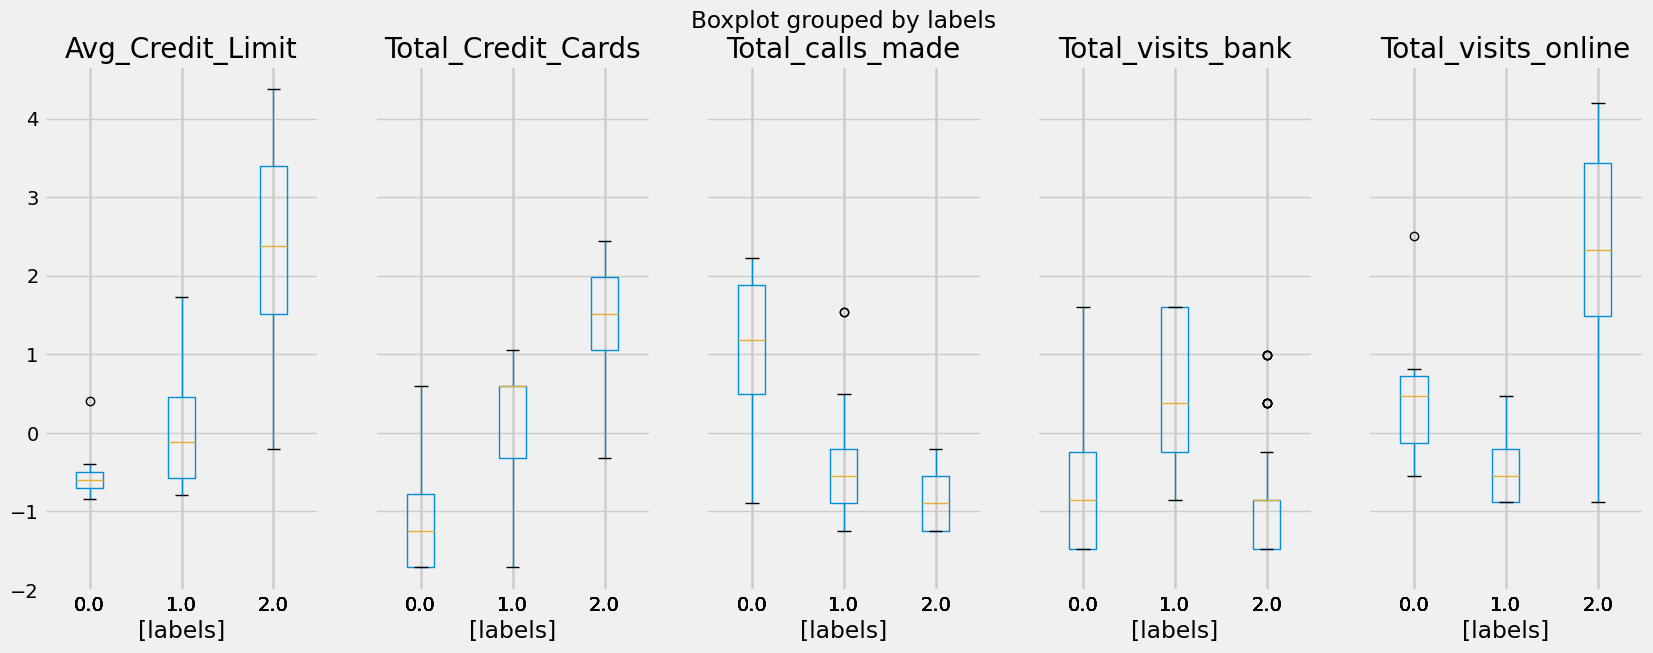

In [21]:
cccd_drop_z.join(cccd_drop_labels).boxplot(by='labels', layout=(1,5), figsize=(20, 7))

* Cluster 0 has lowest {Avg_Credit_Limit, Total_Credit_Cards}, but highest Total_calls_made
* Cluster 1 has average {Avg_Credit_Limit, Total_Credit_Cards}, also highest Total_visits_bank
* Cluster 2 has highest {Avg_Credit_Limit, Total_Credit_Cards}, but highest Total_visits_online

## Hierarchical clustering analysis

### Generate the linkage matrix

In [22]:
# import the function agglomerative clustering from sklearn.cluster package
from sklearn.cluster import AgglomerativeClustering 

In [23]:
# model object of agglomerative clustering with 3 clusters, distance measure is euclidean and average linkage is created
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [24]:
# fiting the model on the scaled data
model.fit(cccd_drop_z)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [25]:
# labels from models are attached to dataset as a separate column. Here labels are nothing but the clusters
cccd_drop['labels'] = model.labels_
cccd_drop.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


In [26]:
# create a groupby object by grouping by labels
cccd_drop_Clust = cccd_drop.groupby(['labels'])

In [27]:
# Calculating mean of each group
cccd_drop_Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,34000.00,5.51,3.48,0.98,2.00
1,141040.00,8.74,0.60,10.90,1.08
2,12263.64,2.40,0.94,3.57,6.90


In [28]:
# from scipy.cluster.hierarchy, importing cophenet, dendrogram, linkage functions
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [29]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [30]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cccd_drop_z, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(cccd_drop_z))

c

0.7395135051413775

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(cccd_drop_z, method='single', metric='euclidean')

Z.shape

(648, 4)

### Plot the dendrogram

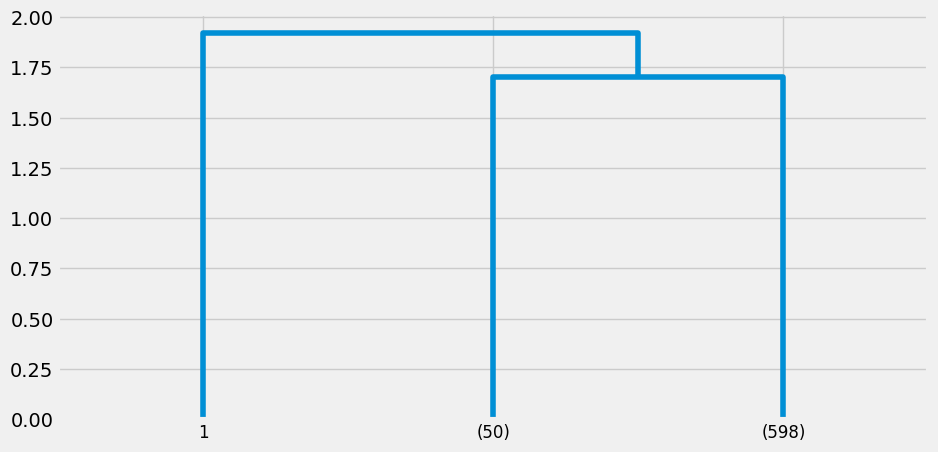

In [32]:
plt.figure(figsize=(10, 5))
dendrogram(Z,truncate_mode='lastp', p=3)
plt.show()

In [33]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cccd_drop_z, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(cccd_drop_z))

c

0.8794736468795109

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(cccd_drop_z, method='complete', metric='euclidean')
Z.shape

(648, 4)

### Plot the dendrogram

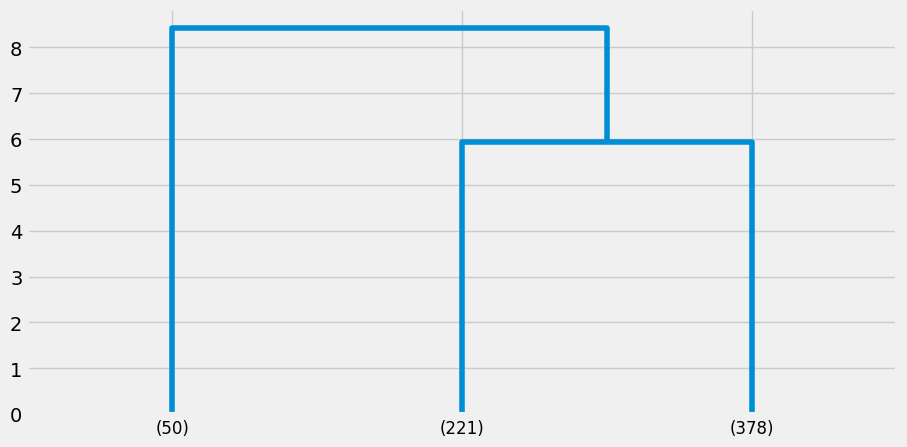

In [35]:
plt.figure(figsize=(10, 5))
dendrogram(Z,truncate_mode='lastp', p=3)
plt.show()

In [36]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cccd_drop_z, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(cccd_drop_z))

c

0.7425813590948763

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(cccd_drop_z, method='ward', metric='euclidean')
Z.shape

(648, 4)

### Plot the dendrogram

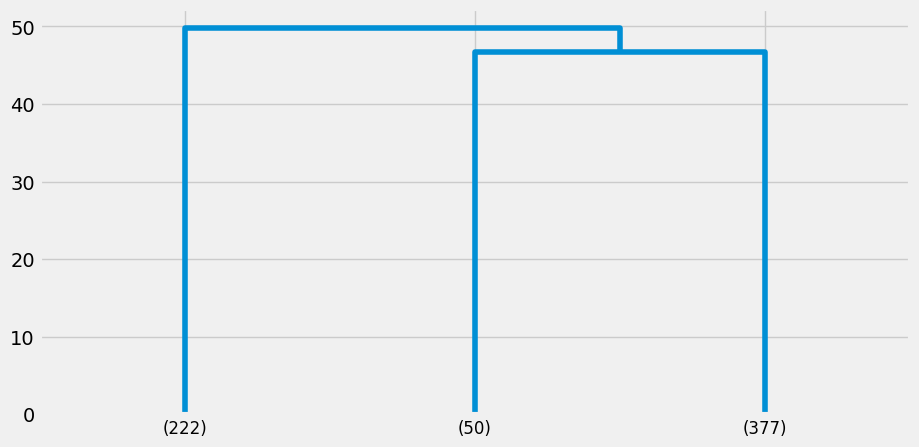

In [38]:
plt.figure(figsize=(10, 5))
dendrogram(Z,truncate_mode='lastp', p=3)
plt.show()

In [39]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cccd_drop_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(cccd_drop_z))

c

0.8974425535306298

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(cccd_drop_z, method='average', metric='euclidean')
Z.shape

(648, 4)

### Plot the dendrogram

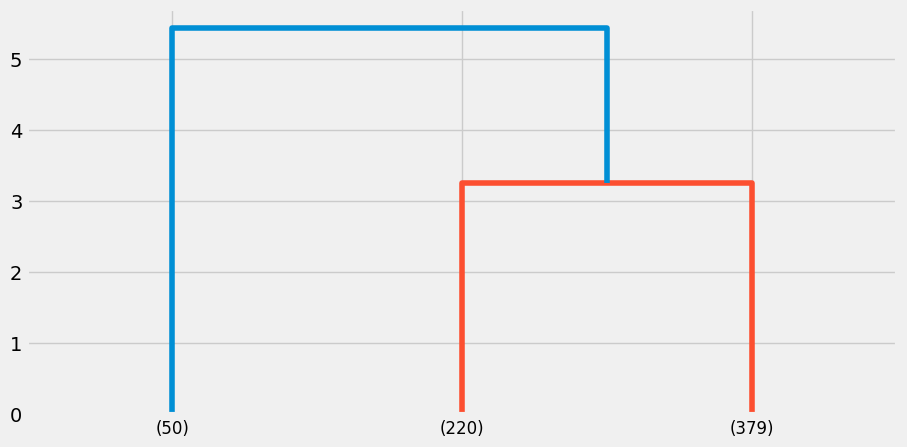

In [41]:
plt.figure(figsize=(10, 5))
dendrogram(Z,truncate_mode='lastp', p=3)
plt.show()

* Of all hierarchical clustering (with different linkages), linkage with average method has highest cophenet index.  
* The correspoding dendogram is more faithful to the data and better compared with others
* However, the distance at which these dendograms combine is different for linkage with different methods

In [42]:
# distance at which the dendograms combine
max_d = 3.2

In [43]:
# import fcluster function from scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster

hierarchical_clusters = fcluster(Z, max_d, criterion='distance')

In [44]:
# Clustering data into 3 different groups
cccd_clusters = pd.DataFrame(hierarchical_clusters, columns = list(['clusters']))
cccd_clusters['clusters'] = cccd_clusters['clusters'].astype('int')
cccd_clusters['clusters'].value_counts().sort_index()

1     50
2    220
3    379
Name: clusters, dtype: int64

* Cluster 3 has highest number of values

array([<AxesSubplot: title={'center': 'Avg_Credit_Limit'}, xlabel='[clusters]'>,
       <AxesSubplot: title={'center': 'Total_Credit_Cards'}, xlabel='[clusters]'>,
       <AxesSubplot: title={'center': 'Total_calls_made'}, xlabel='[clusters]'>,
       <AxesSubplot: title={'center': 'Total_visits_bank'}, xlabel='[clusters]'>,
       <AxesSubplot: title={'center': 'Total_visits_online'}, xlabel='[clusters]'>],
      dtype=object)

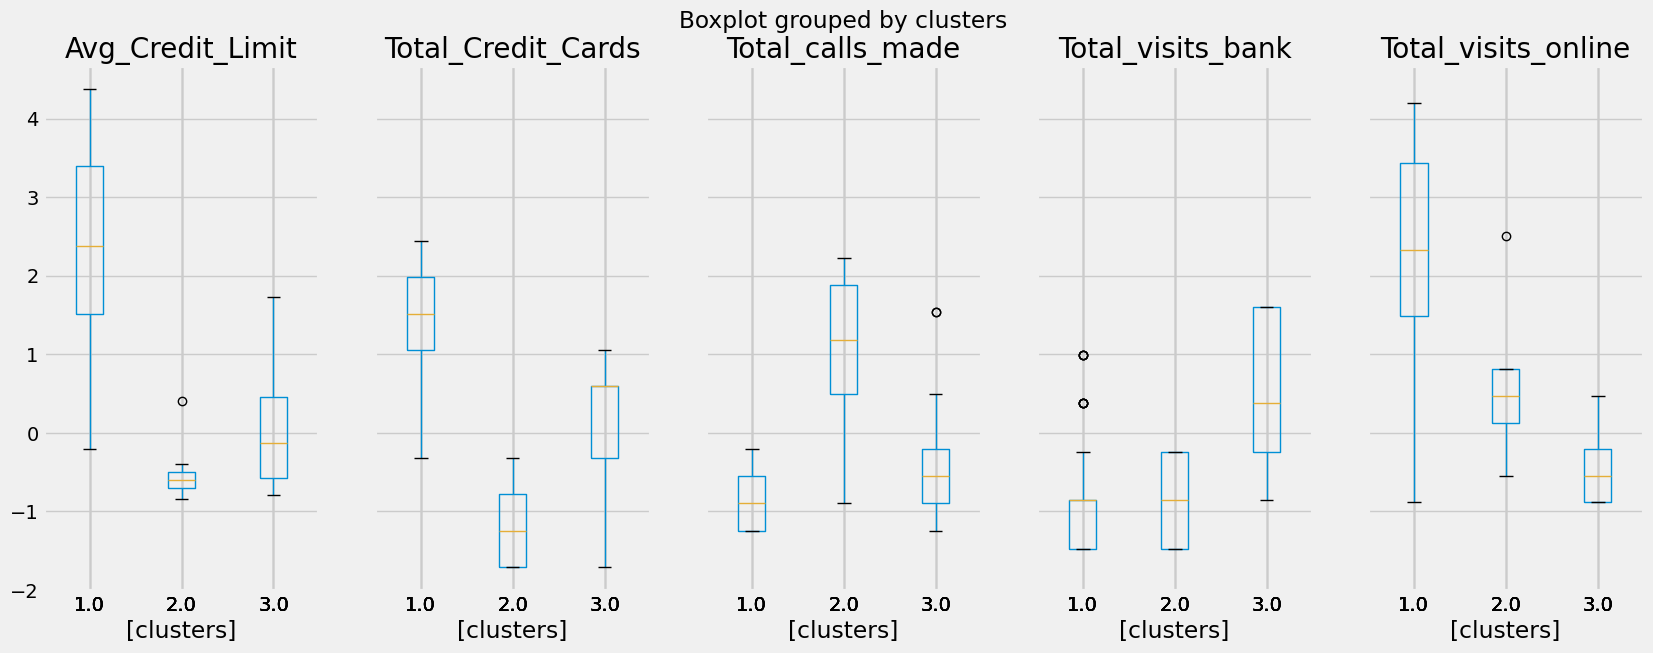

In [45]:
# Analysing clusters using boxplot
cccd_drop_z.join(cccd_clusters).boxplot(by='clusters', layout=(1,5), figsize=(20, 7))

<a id='o1'></a>
#### Observation
* Cluster 1 has highest average total calls made and lowest average avg credit limit and total credit cards
* Cluster 2 has highest average avg credit limit, total credit cards, total visits online and lowest average total calls made and total visits bank.
* Cluster 3 has highest average total visits bank and average lowest total visits online.

# Calculate average silhouette score for both methods. (5 marks)

In [46]:
# Calculating average silhouette score for k-means method
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(cccd_drop_z)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(cccd_drop_z, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.41800025566689647
For n_clusters = 3 The average silhouette_score is : 0.516281010855363
For n_clusters = 4 The average silhouette_score is : 0.3570238219413198
For n_clusters = 5 The average silhouette_score is : 0.2730908848204728
For n_clusters = 6 The average silhouette_score is : 0.2569035285862428
For n_clusters = 7 The average silhouette_score is : 0.24820100806368722
For n_clusters = 8 The average silhouette_score is : 0.22702515587520655
For n_clusters = 9 The average silhouette_score is : 0.227895517040229
For n_clusters = 10 The average silhouette_score is : 0.21356143213875844


In [47]:
# Calculating average silhouetter score Agglomerative method
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(cccd_drop_z)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(cccd_drop_z, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.41728405558680587
For n_clusters = 3 The average silhouette_score is : 0.5153242986631665
For n_clusters = 4 The average silhouette_score is : 0.34761868631378606
For n_clusters = 5 The average silhouette_score is : 0.25639140105979114
For n_clusters = 6 The average silhouette_score is : 0.23006871541032045
For n_clusters = 7 The average silhouette_score is : 0.2231958416928567
For n_clusters = 8 The average silhouette_score is : 0.23052400153585012
For n_clusters = 9 The average silhouette_score is : 0.20701877220937756
For n_clusters = 10 The average silhouette_score is : 0.2055822394265537


* The average shilhouette score is highest at number of clusters equal to 3 for both k means and agglomerative clustering methods

# Compare K-means clusters with Hierarchical clusters. (5 marks)
* Hierarchical Cluster 1 is similar to K-Means Cluster 1<br>
* Hierarchical Cluster 2 is similar to K-Means Cluster 2<br>
* Hierarchical Cluster 3 is similar to K-Means Cluster 0

# Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

## Using K-means method
#### Cluster 0 has lowest {Avg_Credit_Limit, Total_Credit_Cards}, but highest Total_calls_made
> Cluster 0 customers are **poorest**, and they prefer to have queries on call centre
#### Cluster 1 has average {Avg_Credit_Limit, Total_Credit_Cards}, also highest Total_visits_bank
> Cluster 1 is the largest group, these customers are **average**, and they prefer go to the bank for enquiries
#### Cluster 2 has highest {Avg_Credit_Limit, Total_Credit_Cards}, but highest Total_visits_online
> Cluster 2 is the smallest group, but these customers are **richest**, and they prefer to contact the bank online


#### Advices for Marketing and Operation team:
> 1. Marketing team should run online personalised campaigns for Cluster 2 customers
2. Operation team should improve their bank and online service delivery model for Cluster 1 and 2 customers